In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time


In [ ]:
NAME = "sonmodel-{}".format(int(time.time() )  )

In [ ]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir ='logs/{}'.format(NAME) )


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


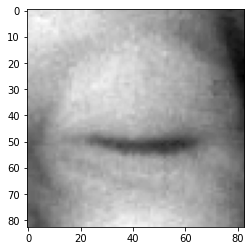

In [ ]:
DATADIR = 'gdrive/My Drive/Yenı/Train_Dataset'
CATEGORIES = ["closed_eye","open_eye"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        break
    break


In [ ]:
img_array.shape

(83, 83)

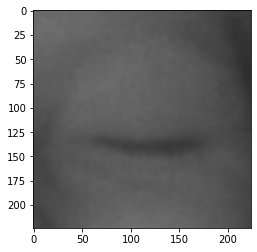

In [ ]:
img_size = 224
new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap = "gray")
plt.show()


In [ ]:
training_data = []

def create_training_data():
    img_num =0
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:     
              img_array = plt.imread(os.path.join(path,img))
              backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
              new_array = cv2.resize(backtorgb, (img_size,img_size))
              training_data.append([new_array,class_num])   
              img_num +=1
              if img_num == 1000:
                 img_num =0
                 break        
            except Exception as e:
                pass 



In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

2000


In [ ]:
import random
random.shuffle(training_data)


In [ ]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)


In [ ]:
X = np.array(X).reshape(-1,img_size,img_size,3) 

X = X/ 255.0
y =np.array(y)


In [ ]:
import pickle
pickle_out = open("yeniX.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("yeniy.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-4].output


In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output1 = layers.Dense(64)(Flat_layer)
final_output2 = layers.Activation("relu")(final_output1)
final_output3 = layers.Dense(1)(final_output2)
final_output = layers.Activation("sigmoid")(final_output3)


In [ ]:
new_model = keras.Model(inputs =base_input, outputs = final_output)

In [ ]:
new_model.summary()

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
new_model.compile(loss = "binary_crossentropy",optimizer = opt,metrics = ["accuracy"])


In [ ]:
new_model.save('/content/drive/MyDrive/models/finalModel.h5')

In [ ]:

new_model.fit(X,y,batch_size = 32, epochs =15,validation_split= 0.2, verbose =2,callbacks = [tensorboard])


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os 
import shutil
import random
import matplotlib.pyplot as plt


In [ ]:
!tensorboard dev upload \
  --logdir logs \
  --name "Sample op-level graph" \
  --one_shot


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  

In [ ]:
test_path = "gdrive/My Drive/Yenı/test_batches"

In [ ]:
test_batches =ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory = test_path, target_size = (224,224), batch_size =10 , shuffle = False)


In [ ]:
test_labels = test_batches.classes

In [ ]:
print(test_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
predictions = new_model.predict(x = test_batches, verbose =0)

In [ ]:
print(predictions)

In [ ]:
test_batches.class_indices



{'closed_eye': 0, 'open_eye': 1}

In [ ]:
cm = confusion_matrix(y_true=test_labels ,y_pred=predictions.argmax(axis=1))
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels,title = 'Confusion Matrix')

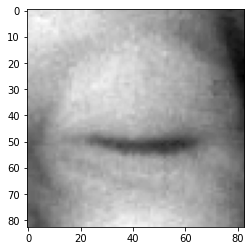

In [ ]:
img_array = plt.imread(os.path.join(path,img))
plt.imshow(img_array,cmap = "gray")
plt.show()
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
final_array = cv2.resize(backtorgb, (224,224))

In [ ]:
input_data = np.array(final_array).reshape(1, 224,224,3)

In [ ]:
input_data.shape

(1, 224, 224, 3)

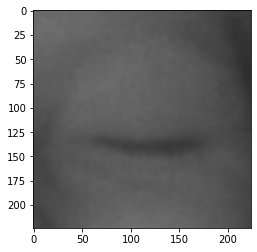

In [ ]:
plt.imshow(final_array)

In [ ]:
input_data = input_data/255.0

In [ ]:
prediction = new_model.predict(input_data)

In [ ]:
print(prediction)

[[0.00063297]]


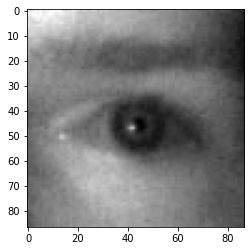

In [ ]:
img_array = plt.imread('gdrive/My Drive/Yenı/Train_Dataset/open_eye/s0019_03916_0_0_1_0_0_01.png')
plt.imshow(img_array,cmap = "gray")
plt.show()
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
final_array = cv2.resize(backtorgb, (224,224))




In [ ]:
input_data = np.array(final_array).reshape(1, 224,224,3)

In [ ]:
input_data.shape

(1, 224, 224, 3)

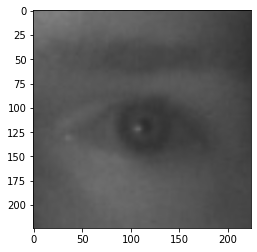

In [ ]:
plt.imshow(final_array)

In [ ]:
input_data = input_data/255.0

In [ ]:
prediction = new_model.predict(input_data)

In [ ]:
print(prediction)

[[0.38243988]]
